# Machine Learning - Homework 1


In [48]:
#importing libraries
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

In [ ]:
dataset = pd.read_csv("train_set.tsv", sep='\t', header=0)
X = dataset.iloc[:,:-2]
y = dataset.iloc[:,-2]
print('File loaded: %d samples.' %(len(dataset)))

## Normalize the dataset

In [50]:
#normalize dataset with min-max normalization

dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())


#### Splitting the data

In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print('Train set: %d samples.' %(len(X_train)))
print('Test set: %d samples.' %(len(X_test)))

#print class 1 and class 0 number
print('Class 1: %d samples.' %(len(y_train[y_train==1])))

Train set: 850 samples.
Test set: 150 samples.


In [66]:
# undersampling dataset

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print('Undersampled train set: %d samples.' %(len(X_resampled)))

#oversampling dataset

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=0)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
# print('Oversampled train set: %d samples.' %(len(X_resampled)))

#remove outliers

from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)
X_train = X_train[y_pred == 1]
y_train = y_train[y_pred == 1]
print('Outliers removed train set: %d samples.' %(len(X_train)))





Undersampled train set: 15 samples.


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

Accuracy is  0.3333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.52      0.49        73
           1       0.19      0.17      0.18        54
           2       0.15      0.18      0.16        17
           3       0.00      0.00      0.00         6

    accuracy                           0.33       150
   macro avg       0.20      0.22      0.21       150
weighted avg       0.31      0.33      0.32       150



/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


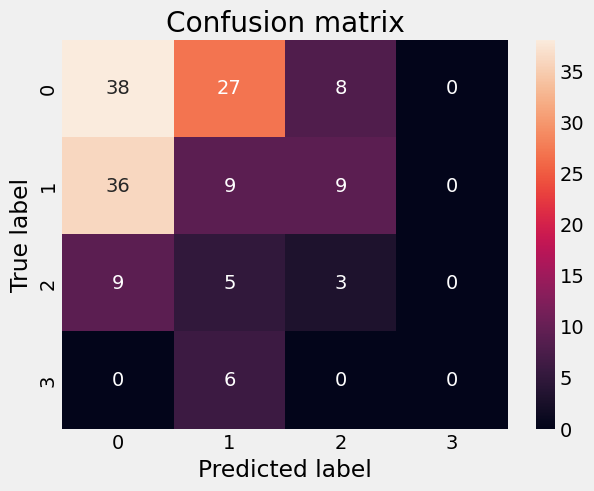

In [67]:
#classiciation with tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





Accuracy is  0.4866666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      1.00      0.65        73
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         6

    accuracy                           0.49       150
   macro avg       0.12      0.25      0.16       150
weighted avg       0.24      0.49      0.32       150



/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fra/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


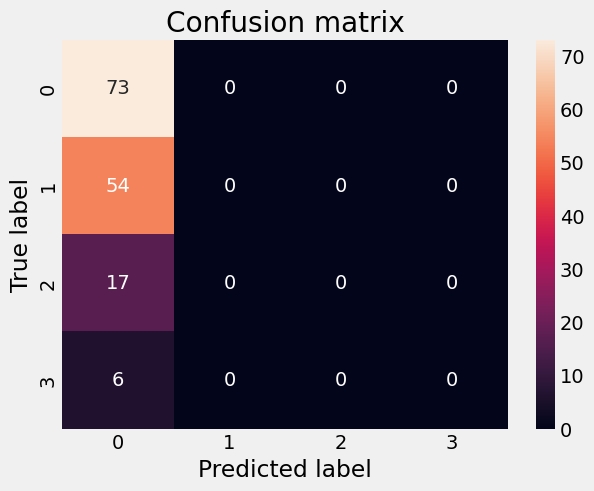

In [62]:
#classiciation with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
#classiciation with naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Classification

### Random Forest

In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

#predicting the test set result
y_pred = classifier.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

#classification report
cr = classification_report(y_test, y_pred)
print(cr)



### SVC

#### Import Libraries

In [27]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Model

In [ ]:
lsvc = LinearSVC()
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr) 

# Iris dataset classification
print("Iris dataset classification with SVC")
iris = load_iris()
x, y = iris.data, iris.target
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.15)

lsvc = LinearSVC()
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(X_test)

cr = classification_report(y_test, ypred)
print(cr) 

#### Confusion Matrix

In [56]:
cm = confusion_matrix(y_test, ypred)
#plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [150, 23]